**FINAL PROJECT**

521H0238_Lê Quang Huy


1)	 **Phân tích thống kê trên dữ liệu,
vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu.
Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
# read csv file
forest_fires_data = pd.read_csv('forestfires.csv')

In [59]:
forest_fires_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [61]:
forest_fires_data.shape

(517, 13)

In [41]:
forest_fires_data.info()
# Descriptive statistical analysis
statistical_summary = forest_fires_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [42]:
# check missing values
missing_values = forest_fires_data.isnull().sum()

In [43]:
print("Total number of values:", forest_fires_data.size)

Total number of values: 6721


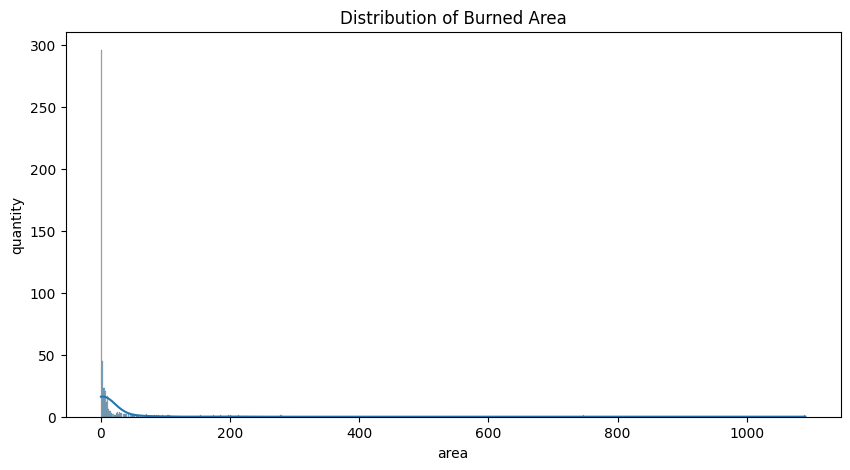

In [44]:
# Phân phối của diện tích bị cháy (biến 'area')
plt.figure(figsize=(10, 5))
sns.histplot(forest_fires_data['area'], kde=True)
plt.title('Distribution of Burned Area')
plt.xlabel('area')
plt.ylabel('quantity')
plt.show()

<ipython-input-45-3f811e6731df>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest_fires_data.corr(), annot=True, cmap='coolwarm')


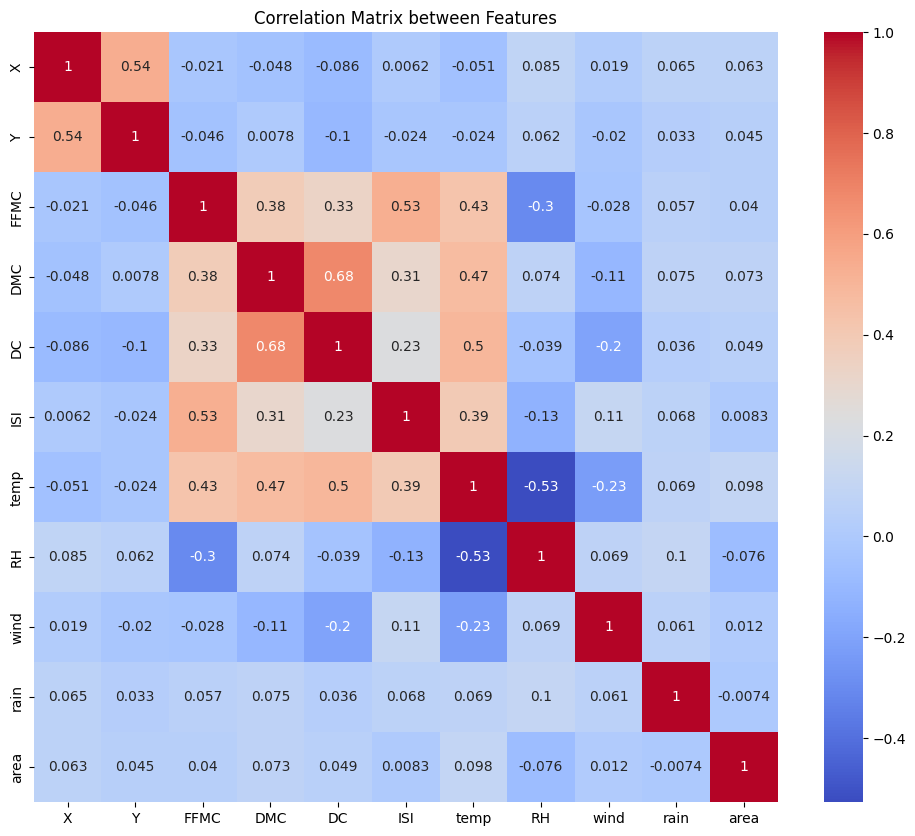

In [45]:
# Correlation chart between quantitative characteristics
plt.figure(figsize=(12, 10))
sns.heatmap(forest_fires_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Features')
plt.show()

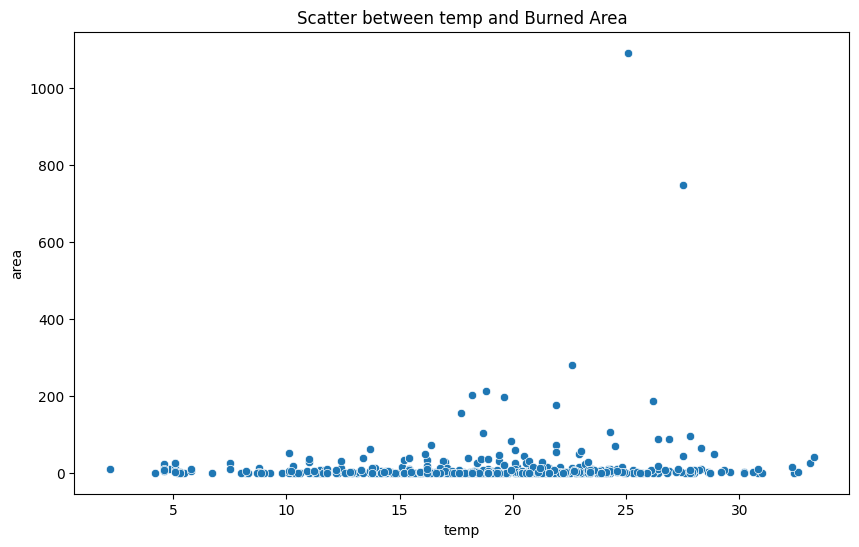

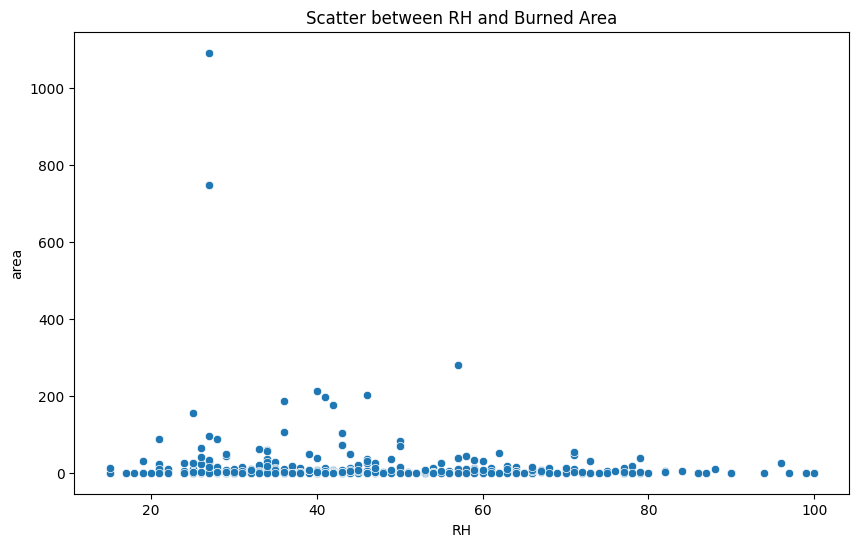

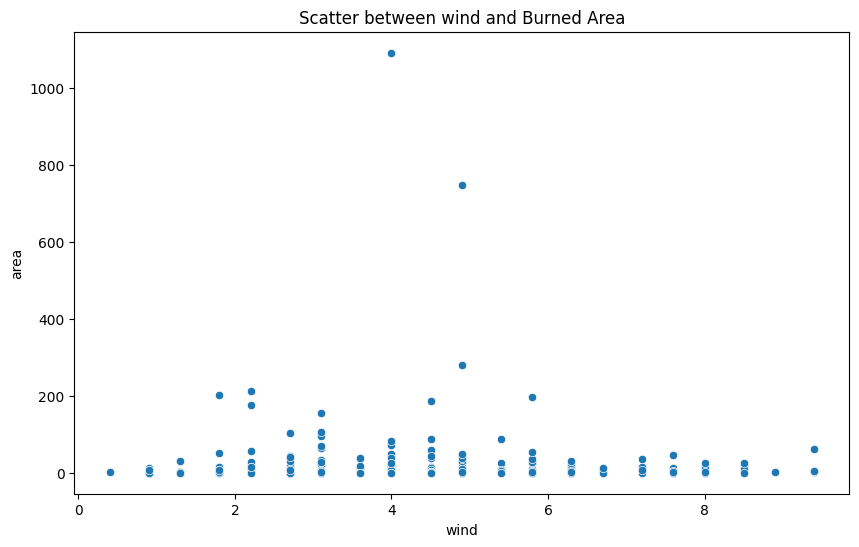

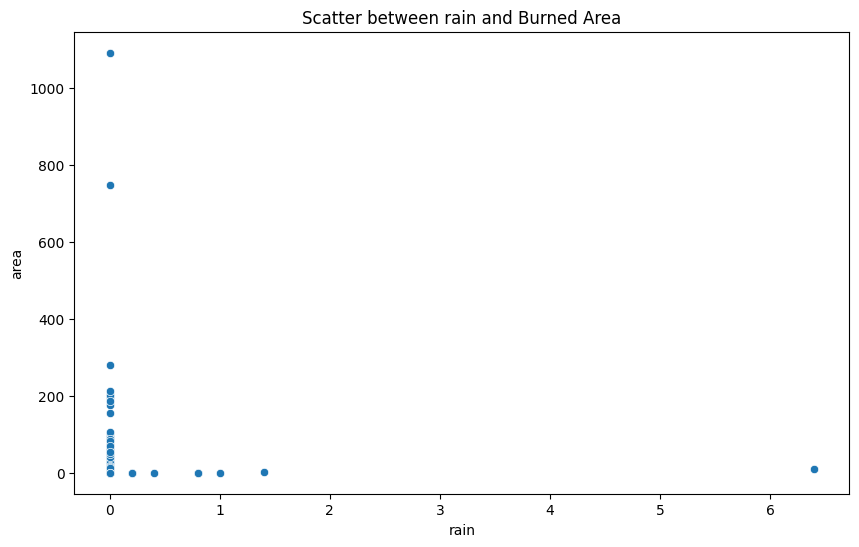

In [46]:
# A scatter plot between burned area and some main characteristics
features = ['temp', 'RH', 'wind', 'rain']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=forest_fires_data[feature], y=forest_fires_data['area'])
    plt.title(f'Scatter between {feature} and Burned Area')
    plt.xlabel(feature)
    plt.ylabel('area')
    plt.show()

**2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
# Prepare data
# Convert categorical columns to numbers
categorical_features = ['month', 'day']
numerical_features = forest_fires_data.drop(['area', 'month', 'day'], axis=1).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [49]:
# Divide the data into training and testing sets
X = forest_fires_data.drop('area', axis=1)
y = forest_fires_data['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(413, 12)
(413,)
(104, 12)
(104,)


<Figure size 1500x600 with 0 Axes>

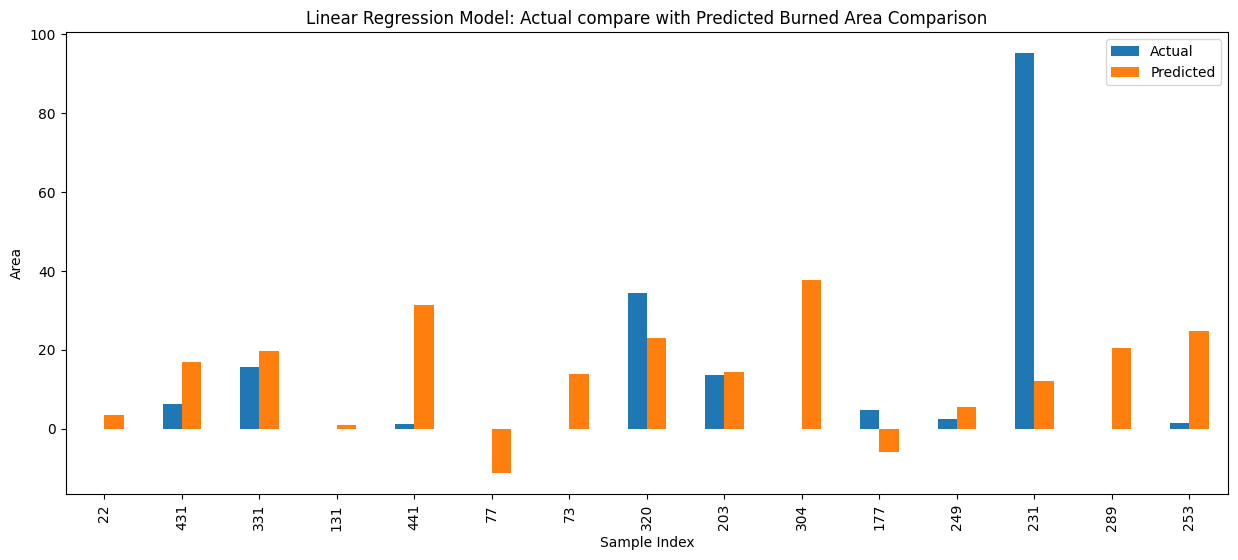

In [54]:
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

lr_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': lr_predictions})

lr_comparison_sample = lr_comparison.sample(n=15, random_state=20)

plt.figure(figsize=(15, 6))
lr_comparison_sample.plot(kind='bar', figsize=(15, 6))
plt.title('Linear Regression Model: Actual compare with Predicted Burned Area Comparison')
plt.xlabel('Sample Index')
plt.ylabel('Area')
plt.show()

<Figure size 1500x600 with 0 Axes>

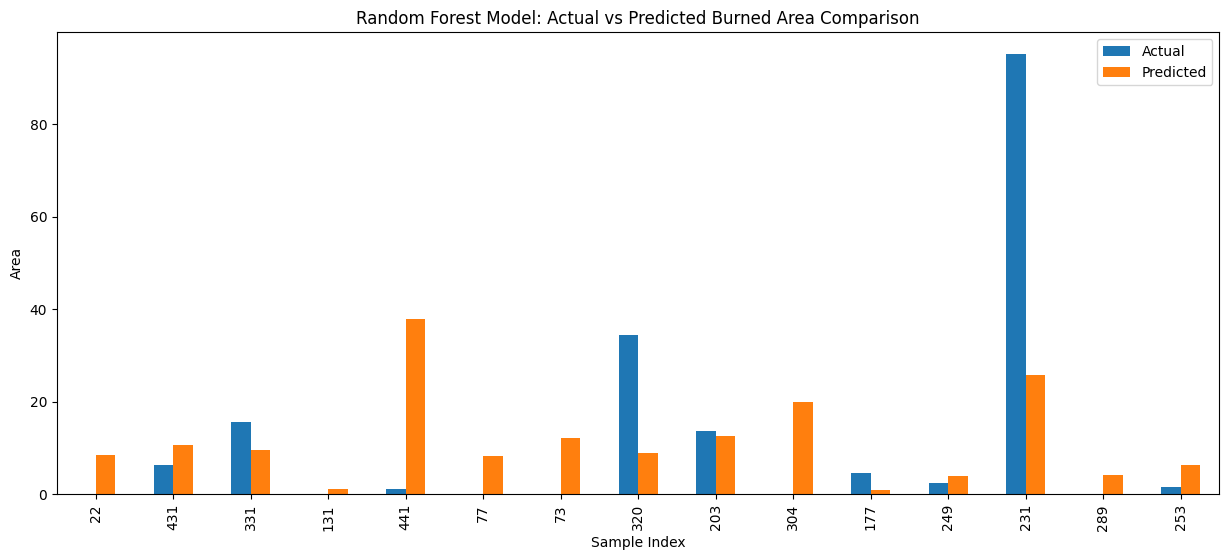

In [55]:
# Creating the Random Forest pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessor defined earlier
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})

rf_comparison_sample = rf_comparison.sample(n=15, random_state=20)

plt.figure(figsize=(15, 6))
rf_comparison_sample.plot(kind='bar', figsize=(15, 6))
plt.title('Random Forest Model: Actual vs Predicted Burned Area Comparison')
plt.xlabel('Sample Index')
plt.ylabel('Area')
plt.show()

In [62]:
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Linear Regression Model Accuracy Metrics:")
print(f"Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"R² Score: {lr_r2:.4f}")

print("\nRandom Forest Model Accuracy Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R² Score: {rf_r2:.4f}")


Linear Regression Model Accuracy Metrics:
Mean Squared Error (MSE): 11613.67
Mean Absolute Error (MAE): 24.53
R² Score: 0.0148

Random Forest Model Accuracy Metrics:
Mean Squared Error (MSE): 12026.54
Mean Absolute Error (MAE): 26.97
R² Score: -0.0203


**3)	Sử dụng Feed Forward Neural Network**

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection

In [19]:
# Preprocessing for categorical columns
categorical_features = ['month', 'day']  # List of taxonomy columns
one_hot = OneHotEncoder()

In [20]:
# Prepare data
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot, categorical_features)
    ],
    remainder='passthrough'  # The remaining numeric columns remain unchanged
)

In [21]:
X_processed = preprocessor.fit_transform(forest_fires_data.drop('area', axis=1))
y = forest_fires_data['area']

nn_scaler = MinMaxScaler()

X_scaled = nn_scaler.fit_transform(X_processed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_scaled = nn_scaler.transform(X_train.astype(np.float))
X_test_scaled = nn_scaler.transform(X_test.astype(np.float))

<ipython-input-21-68696d0dc614>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_scaled = nn_scaler.transform(X_train.astype(np.float))
<ipython-input-21-68696d0dc614>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_scaled = nn_scaler.transform(X_test.astype(np.float))


In [22]:
# Build the FFNN model
ffnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [24]:
ffnn_model.compile(optimizer='adam', loss='mean_squared_error')
history = ffnn_model.fit(X_train_scaled, y_train, epochs=70, batch_size=32, sample_weight=np.ones(len(y_train)))

Epoch 1/70
13/13 [==============================] - 1s 2ms/step - loss: 1925.9819
Epoch 2/70
13/13 [==============================] - 0s 2ms/step - loss: 1917.7913
Epoch 3/70
13/13 [==============================] - 0s 2ms/step - loss: 1921.8278
Epoch 4/70
13/13 [==============================] - 0s 2ms/step - loss: 1914.6876
Epoch 5/70
13/13 [==============================] - 0s 2ms/step - loss: 1917.7753
Epoch 6/70
13/13 [==============================] - 0s 3ms/step - loss: 1916.3375
Epoch 7/70
13/13 [==============================] - 0s 2ms/step - loss: 1917.4576
Epoch 8/70
13/13 [==============================] - 0s 2ms/step - loss: 1914.0070
Epoch 9/70
13/13 [==============================] - 0s 2ms/step - loss: 1913.8997
Epoch 10/70
13/13 [==============================] - 0s 3ms/step - loss: 1917.4716
Epoch 11/70
13/13 [==============================] - 0s 2ms/step - loss: 1916.9149
Epoch 12/70
13/13 [==============================] - 0s 2ms/step - loss: 1911.5825
Epoch 13/70
1

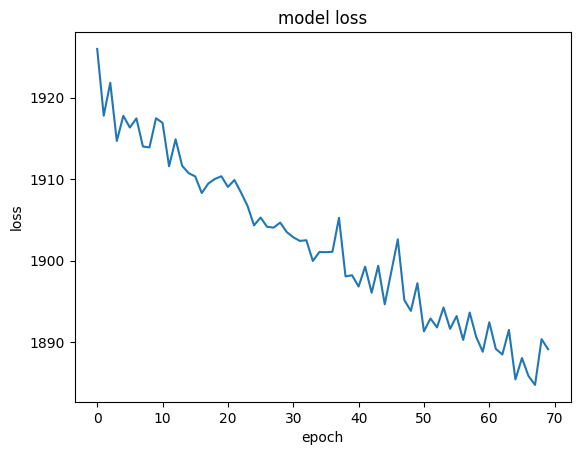

In [25]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Tránh Overfiting trên FFNN bằng dropout**


In [27]:
from tensorflow.keras.layers import Dropout

ffnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Dropout layer
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer
    Dense(1, activation='linear')
])
ffnn_model.compile(optimizer='adam', loss='mean_squared_error')
history1=ffnn_model.fit(X_train_scaled, y_train, epochs=70, batch_size=32)

Epoch 1/70
13/13 [==============================] - 1s 2ms/step - loss: 2204.3735
Epoch 2/70
13/13 [==============================] - 0s 2ms/step - loss: 2202.8867
Epoch 3/70
13/13 [==============================] - 0s 2ms/step - loss: 2194.2554
Epoch 4/70
13/13 [==============================] - 0s 2ms/step - loss: 2190.6565
Epoch 5/70
13/13 [==============================] - 0s 2ms/step - loss: 2184.3032
Epoch 6/70
13/13 [==============================] - 0s 3ms/step - loss: 2178.9727
Epoch 7/70
13/13 [==============================] - 0s 2ms/step - loss: 2172.6995
Epoch 8/70
13/13 [==============================] - 0s 2ms/step - loss: 2161.2742
Epoch 9/70
13/13 [==============================] - 0s 2ms/step - loss: 2151.6375
Epoch 10/70
13/13 [==============================] - 0s 2ms/step - loss: 2130.7864
Epoch 11/70
13/13 [==============================] - 0s 2ms/step - loss: 2128.3481
Epoch 12/70
13/13 [==============================] - 0s 2ms/step - loss: 2116.0037
Epoch 13/70
1

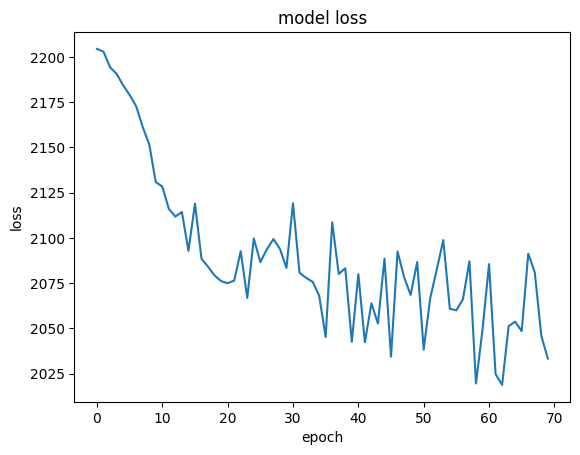

In [28]:
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**3)	Sử dụng Reccurent Neural Network**

In [29]:
from tensorflow.keras.layers import SimpleRNN
# Prepare data for RNN (need to reshape data)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

In [30]:
# Build an RNN model
rnn_model = Sequential([
    SimpleRNN(50, input_shape=(1, X_train_scaled.shape[1]), activation='relu'),
    Dense(1, activation='linear')
])

In [31]:
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
history2=rnn_model.fit(X_train_rnn, y_train, epochs=70, batch_size=32)

Epoch 1/70
13/13 [==============================] - 2s 3ms/step - loss: 2206.8186
Epoch 2/70
13/13 [==============================] - 0s 2ms/step - loss: 2202.1924
Epoch 3/70
13/13 [==============================] - 0s 2ms/step - loss: 2198.5544
Epoch 4/70
13/13 [==============================] - 0s 2ms/step - loss: 2194.0308
Epoch 5/70
13/13 [==============================] - 0s 3ms/step - loss: 2190.0000
Epoch 6/70
13/13 [==============================] - 0s 2ms/step - loss: 2185.2627
Epoch 7/70
13/13 [==============================] - 0s 2ms/step - loss: 2180.5769
Epoch 8/70
13/13 [==============================] - 0s 2ms/step - loss: 2176.3254
Epoch 9/70
13/13 [==============================] - 0s 2ms/step - loss: 2170.1455
Epoch 10/70
13/13 [==============================] - 0s 2ms/step - loss: 2164.6248
Epoch 11/70
13/13 [==============================] - 0s 2ms/step - loss: 2158.9028
Epoch 12/70
13/13 [==============================] - 0s 2ms/step - loss: 2152.9392
Epoch 13/70
1

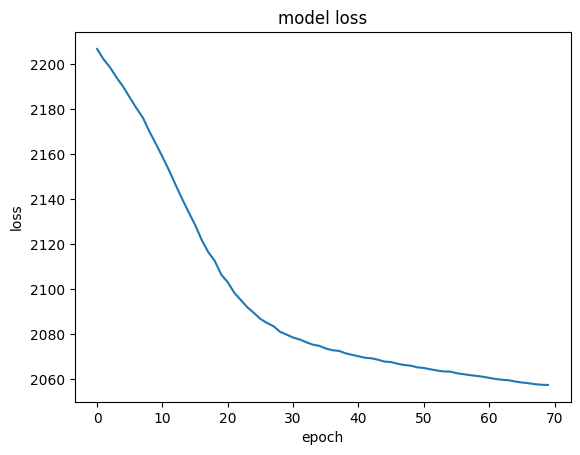

In [32]:
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Tránh Overfiting trên RNN bằng Early Stopping**


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

rnn_model = Sequential([
    SimpleRNN(50, input_shape=(1, X_train_scaled.shape[1]), activation='relu'),
    Dense(1, activation='linear')
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
history3=rnn_model.fit(X_train_rnn, y_train, epochs=70, batch_size=32,
              validation_split=0.2, callbacks=[early_stopping])

Epoch 1/70
11/11 [==============================] - 2s 31ms/step - loss: 2597.7632 - val_loss: 628.3688
Epoch 2/70
11/11 [==============================] - 0s 5ms/step - loss: 2593.3733 - val_loss: 626.2279
Epoch 3/70
11/11 [==============================] - 0s 6ms/step - loss: 2590.1768 - val_loss: 623.9970
Epoch 4/70
11/11 [==============================] - 0s 6ms/step - loss: 2586.0127 - val_loss: 621.9172
Epoch 5/70
11/11 [==============================] - 0s 5ms/step - loss: 2582.3103 - val_loss: 619.8350
Epoch 6/70
11/11 [==============================] - 0s 5ms/step - loss: 2578.4067 - val_loss: 617.6133
Epoch 7/70
11/11 [==============================] - 0s 7ms/step - loss: 2574.3071 - val_loss: 615.1992
Epoch 8/70
11/11 [==============================] - 0s 5ms/step - loss: 2569.8293 - val_loss: 612.7041
Epoch 9/70
11/11 [==============================] - 0s 4ms/step - loss: 2564.8503 - val_loss: 610.1855
Epoch 10/70
11/11 [==============================] - 0s 5ms/step - loss:

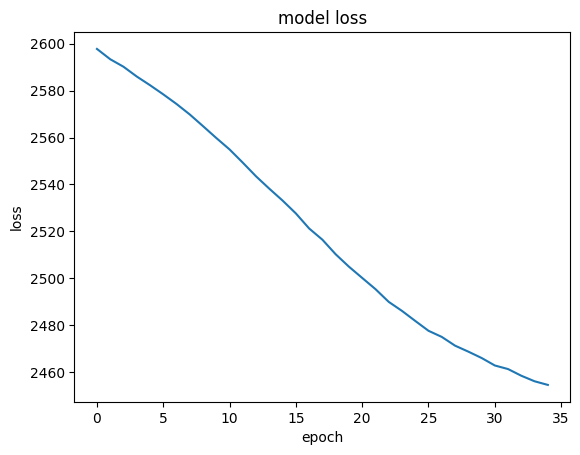

In [34]:
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()